<a href="https://colab.research.google.com/github/Ignas12345/Magistro_projektas/blob/main/knygutes/TCGA_isoformu_skaitymas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [5]:
url = 'https://raw.githubusercontent.com/Ignas12345/Magistro_projektas/refs/heads/main/duomenys/filtered_isoform_read_per_million_RNA_mapped.csv'
df = pd.read_csv(url, )
df.head()

,Unnamed: 0,TCGA-2G-AAG5-01A-11R-A439-13,TCGA-2G-AAG6-01A-11R-A439-13,TCGA-2G-AAGV-01A-11R-A439-13,TCGA-2G-AAGX-01A-11R-A439-13,TCGA-2G-AAGY-01A-11R-A439-13,TCGA-2G-AAGY-05A-11R-A439-13,TCGA-2G-AAEW-01A-11R-A439-13,TCGA-2G-AAEX-01A-11R-A439-13,TCGA-2G-AAF1-01A-11R-A439-13,...,TCGA-YU-AA4L-01A-11R-A43A-13,TCGA-YU-AA61-01A-11R-A43A-13,TCGA-ZM-AA05-01A-12R-A43A-13,TCGA-ZM-AA06-01A-12R-A43A-13,TCGA-ZM-AA0B-01A-11R-A43A-13,TCGA-ZM-AA0D-01A-11R-A43A-13,TCGA-ZM-AA0E-01A-12R-A43A-13,TCGA-ZM-AA0F-01A-21R-A43A-13,TCGA-ZM-AA0H-01A-11R-A43A-13,TCGA-ZM-AA0N-01A-21R-A43A-13
0,"hsa-let-7a-1, mature,MIMAT0000062",8442.150108,9733.713953,8041.494616,14120.154510,6193.217126,6483.152667,6619.132919,7412.830012,7711.910036,...,2832.443917,9104.099446,6668.826594,5451.417069,5148.370818,6938.135815,3701.072497,8413.282384,5926.730879,8547.070595
1,"hsa-let-7a-1, mature,MIMAT0004481",12.655100,7.216914,7.132565,16.142226,14.458626,4.028750,4.294653,3.647631,5.938329,...,3.661307,12.330930,8.466788,4.913399,7.076356,9.688443,9.122140,6.207074,11.366958,7.440915
2,"hsa-let-7a-2, mature,MIMAT0000062",8413.761636,9718.890021,7995.290739,14156.171267,6141.420291,6618.339583,6651.745435,7454.356898,7686.786336,...,2854.975041,9138.167594,6618.240226,5416.102006,5147.727513,6837.012697,3620.860572,8343.205428,5898.060892,8565.037680
3,"hsa-let-7a-2, mature,MIMAT0010195",25.652234,20.480429,10.541048,52.718828,46.076938,2.685833,1.744703,2.525284,1.370384,...,0.000000,12.251886,4.072632,7.063012,1.929915,1.362437,1.572782,4.138050,3.788986,3.992685
4,"hsa-let-7a-2, precursor",2.223193,1.267835,1.388641,3.452383,5.719896,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
mir_ids = df["Unnamed: 0"].to_numpy()
df_trimmed = df.drop(df.columns[0], axis=1)

In [7]:
full_data = df_trimmed.to_numpy(dtype = np.int32)

In [8]:
#susicentruojam duomenis, jei reikia
X = full_data.T
#X = X - np.mean(X, axis = 0)
print(np.shape(X))
print(np.shape(mir_ids))

(139, 977)
(977,)


In [ ]:
print(mir_ids[0:976])

['hsa-let-7a-1, mature,MIMAT0000062' 'hsa-let-7a-1, mature,MIMAT0004481'
 'hsa-let-7a-2, mature,MIMAT0000062' 'hsa-let-7a-2, mature,MIMAT0010195'
 'hsa-let-7a-2, precursor' 'hsa-let-7a-3, mature,MIMAT0000062'
 'hsa-let-7a-3, mature,MIMAT0004481' 'hsa-let-7b, mature,MIMAT0000063'
 'hsa-let-7b, mature,MIMAT0004482' 'hsa-let-7c, mature,MIMAT0000064'
 'hsa-let-7c, mature,MIMAT0026472' 'hsa-let-7d, mature,MIMAT0000065'
 'hsa-let-7d, mature,MIMAT0004484' 'hsa-let-7e, mature,MIMAT0000066'
 'hsa-let-7e, mature,MIMAT0004485' 'hsa-let-7f-1, mature,MIMAT0000067'
 'hsa-let-7f-1, mature,MIMAT0004486' 'hsa-let-7f-2, mature,MIMAT0000067'
 'hsa-let-7f-2, precursor' 'hsa-let-7g, mature,MIMAT0000414'
 'hsa-let-7g, mature,MIMAT0004584' 'hsa-let-7i, mature,MIMAT0000415'
 'hsa-let-7i, mature,MIMAT0004585' 'hsa-mir-1-1, mature,MIMAT0000416'
 'hsa-mir-1-2, mature,MIMAT0000416' 'hsa-mir-100, mature,MIMAT0000098'
 'hsa-mir-100, mature,MIMAT0004512' 'hsa-mir-101-1, mature,MIMAT0000099'
 'hsa-mir-101-1, mature,M

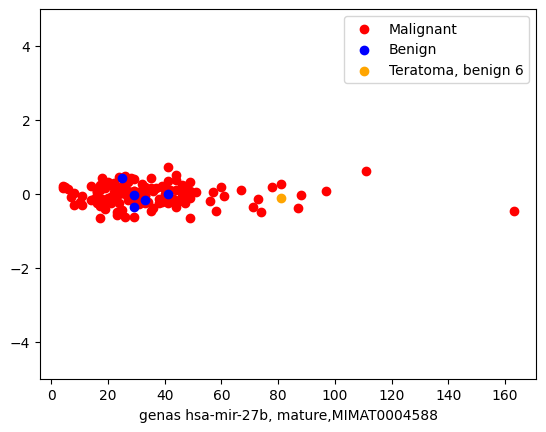

In [9]:
#galime patikrinti kaip pavieniu miRNR raiska skiriasi tarp piktybiniu ir nepiktybiniu naviku

try:
  i=np.where(mir_ids == 'hsa-mir-27b, mature,MIMAT0004588')[0][0]
  #i = 109


  plt.scatter(X[6:139, i], np.random.normal(scale=0.3, size = len(X[6:139, 0])), c = 'r', label = 'Malignant')
  plt.scatter(X[:5, i], np.random.normal(scale=0.3, size = len(X[:5, 0])), c = 'b', label = 'Benign')
  plt.scatter(X[5, i], -0.1, c = 'orange', label = 'Teratoma, benign 6')
  plt.xlabel('genas ' + str(mir_ids[i]))
  plt.ylim(-5, 5)
  plt.legend()
  plt.show()
except:
    print('Sitas genas isfiltruotas - reiktu pakeisti X matrica')


In [ ]:
#pabandom surasti miRNR, kuriu raiska labiausiai skiriasi

scaler = StandardScaler()
transformed_X = scaler.fit_transform(X)

arr = transformed_X #gali buti X arba transformed_X (antru atveju genu raisku dispersijos yra suvienodintos - t.y. vienodai svarbos duodam genams, kuriu raiskos gali buti nuo 0 iki 1000, ar nuo 0 iki 100000 ar nuo 0 iki 1000000)
Ter = arr[0:6]
teratoma_benign_means = np.mean(Ter, axis = 0)
all_means = np.mean(arr, axis = 0)

arr = teratoma_benign_means - all_means

sorted_indices = np.argsort(-np.abs(arr))
sorted_array = arr[sorted_indices]

print("Genai, kuriu vidurkiai tarp nepiktybiniu/piktybiniu meginiu labiausiai skiriasi:", sorted_indices[:30])


Genai, kuriu vidurkiai tarp nepiktybiniu/piktybiniu meginiu labiausiai skiriasi: [118  46  44 109  54 264  11 117   4  27  26 130  77   2   0   1 230   6
   3 134 228 263  10 232 156  82  86 155  85  84]


In [ ]:
arr = transformed_X #gali buti ir nenormalizuoti/netransformuoti duomenys
Ter = arr[0:6]
teratoma_benign_vars = np.var(Ter, axis = 0)
all_vars = np.var(arr, axis = 0)


arr_2 = teratoma_benign_vars - all_vars

sorted_indices_2 = np.argsort(-np.abs(arr_2))
sorted_array_2 = arr_2[sorted_indices_2]

print("Genai, kuriu dispersija tarp nepiktybiniu/piktybiniu meginiu labiausiai skiriasi:", sorted_indices_2[0:30])

Genai, kuriu dispersija tarp nepiktybiniu/piktybiniu meginiu labiausiai skiriasi: [ 44  46  70 243 130 264   4 118 109  54 117  21 156   3 230 155  77 134
 120 103  39   2   0   1 104  11 131 263   7   8]
